<a href="https://colab.research.google.com/github/Cap10nem0/wine_reviews/blob/main/Wine_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload the Excel file
uploaded = files.upload()

Saving winemag-data-130k-v2.csv to winemag-data-130k-v2.csv


In [4]:
# Get the file name
excel_filename = list(uploaded.keys())[0]
print(excel_filename)

winemag-data-130k-v2.csv


In [14]:
# Read the Excel file
reviews = pd.read_csv(excel_filename,index_col=0)  #using index_col=0 means read_csv won't read in row name (index) as a separated column
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [17]:
import pandas as pd

# Assuming your DataFrame is named 'df'
rows = reviews.shape[0]
columns = reviews.shape[1]

print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 129971
Number of columns: 13


In [19]:
# Count of null values column-wise
null_count = reviews.isnull().sum()

# Percentage of null values column-wise
null_percentage = (null_count / rows) * 100

# Display the results
print("Count of null values column-wise:")
print(null_count)
print("\nPercentage of null values column-wise:")
print(null_percentage)

Count of null values column-wise:
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64 country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

Percentage of null values column-wise:
country                   0.048472
descr

# Basic EDA

I will try to answer some basic questions first based upon the dataset. Some questions like -

1. Cost of cheapest and most expensive wine
2. Highest and lowest rated wine
3. Country with highest and least production
4. Taster/Reviewer with most and least number of reviews
5. Highest and lowest Wine type by reviews



### 1. Cost of cheapest and most expensive wine

In [40]:
reviews.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

The output provides a summary of the "price" column from a dataset. There are 120,975 data points in total.  

*   The **average** price of wine is approximately **\$35.36**, with a standard deviation of approximately 41.02.
*   The **cheapest** wine costs **\$4** while the **most expensive** wine costs **\$3300**.

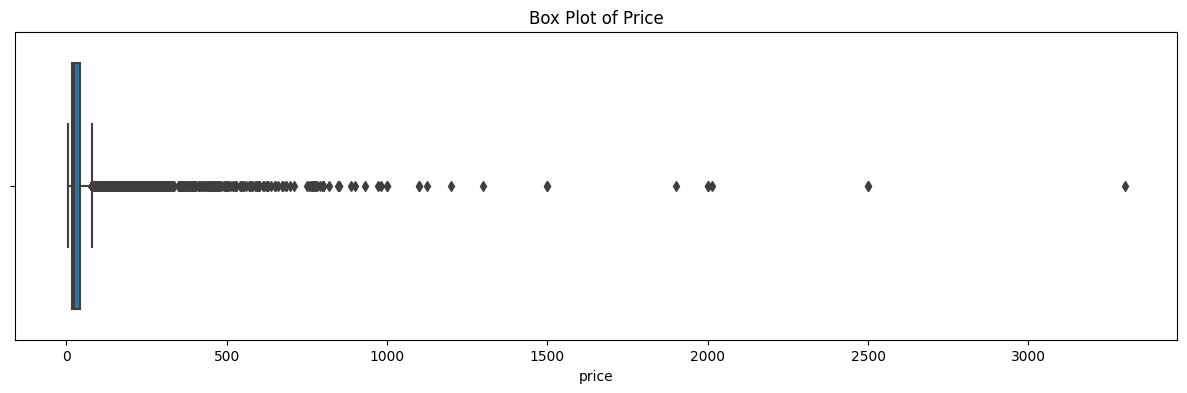

In [48]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=reviews, x='price')
plt.title('Box Plot of Price')
plt.show()

In [23]:
most_expensive_wine = reviews[reviews["price"] == reviews["price"].max()]
most_expensive_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


In [28]:
cheapest_wine = reviews[reviews["price"] == reviews["price"].min()]
cheapest_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis
20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote
29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit
59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties
61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal
64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit
110255,US,"A good everyday Merlot, dry and rich in tannin...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit
112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal
117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis


In [31]:
cheapest_wine_sorted = reviews[reviews["price"] == reviews["price"].min()].sort_values("points", ascending=False)
cheapest_wine_sorted

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit
126096,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Anna Lee C. Iijima,NaN,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,Cramele Recas
1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis
20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote
29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit
61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal
110255,US,"A good everyday Merlot, dry and rich in tannin...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit
112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal
59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties


### 2. Highest and least points

In [41]:
reviews.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

The output also provides a summary of the "points" column from a dataset. There are 129,971 data points in total.  

*   The **average** rating score of wine is approximately **88.45**, with a standard deviation of approximately 3.04.
*   The minimum score is **80** and maximum is **100**.
*   The median (50th percentile) is 88, indicating that **half of the ratings have value less than 88**.

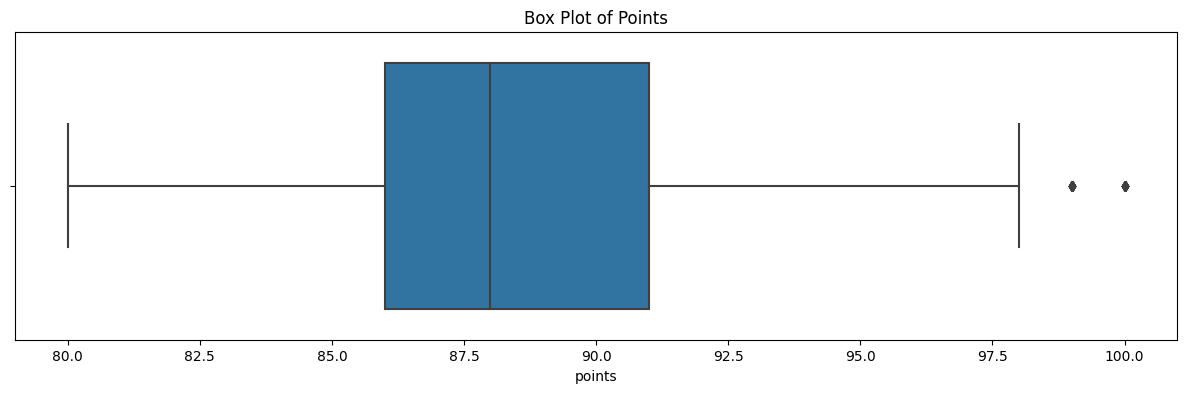

In [49]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=reviews, x='points')
plt.title('Box Plot of Points')
plt.show()

In [50]:
highest_rating_wine = reviews[reviews["points"] == reviews["points"].max()]
highest_rating_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


In [52]:
len(highest_rating_wine)

19

In [51]:
lowest_rating_wine = reviews[reviews["points"] == reviews["points"].min()]
lowest_rating_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
344,Chile,"Aromas of pumpkin, squash and corn chips are s...",Gran Reserva,80,19.0,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,Viña Tarapacá 2015 Gran Reserva Chardonnay (Le...,Chardonnay,Viña Tarapacá
3640,Portugal,Aromas of strawberry sherbet are followed by s...,Estreia,80,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Viniverde 2011 Estreia Rosé (Vinho Verde),Rosé,Viniverde
3641,Chile,"Fluffy, sweet aromas of peach, pear and vanill...",Reserve,80,15.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Cuevas del Sur 2010 Reserve Chardonnay (Maule ...,Chardonnay,Cuevas del Sur
4556,Italy,"There's a thorny, almost raw quality of fruit ...",Rondineto,80,12.0,Central Italy,Colli Aprutini,NaN,NaN,NaN,Fattoria Giuseppe Savini 2011 Rondineto Merlot...,Merlot,Fattoria Giuseppe Savini
4557,Spain,"With dusty, candied aromas, the bouquet on thi...",Demi Sec,80,14.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Paul Cheneau NV Demi Sec Sparkling (Cava),Sparkling Blend,Paul Cheneau
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128258,US,This Chardonnay-Viognier blend is slightly swe...,Devil's Daughter,80,25.0,California,Contra Costa County,Central Coast,NaN,NaN,Bloomfield 2008 Devil's Daughter White (Contra...,White Blend,Bloomfield
128259,US,"While there's some nice, honest fruit here, it...",NaN,80,14.0,Missouri,Missouri,NaN,NaN,NaN,Montelle 2008 Chambourcin (Missouri),Chambourcin,Montelle
128260,US,"Banana, clove and orange peel open for this sw...",Lucky Twenty,80,12.0,Colorado,Colorado,NaN,NaN,NaN,BookCliff NV Lucky Twenty White (Colorado),White Blend,BookCliff
128261,US,"Short and slightly sweet, there's nutty overto...",Proprietor's Reserve,80,13.0,Pennsylvania,Pennsylvania,NaN,NaN,NaN,Chaddsford 2007 Proprietor's Reserve White (Pe...,White Blend,Chaddsford


In [53]:
len(lowest_rating_wine)

397

### 3. Countries with highest and lowest count of rating

In [64]:
reviews.country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

Since there are **43 unique values**, its better to just use text and count to find out instead of visualization

In [61]:
country_counts = reviews['country'].value_counts()
country_counts

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

### 4. Taster with most and least reviews

In [66]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

We can use horizontal bar graph to visualize this

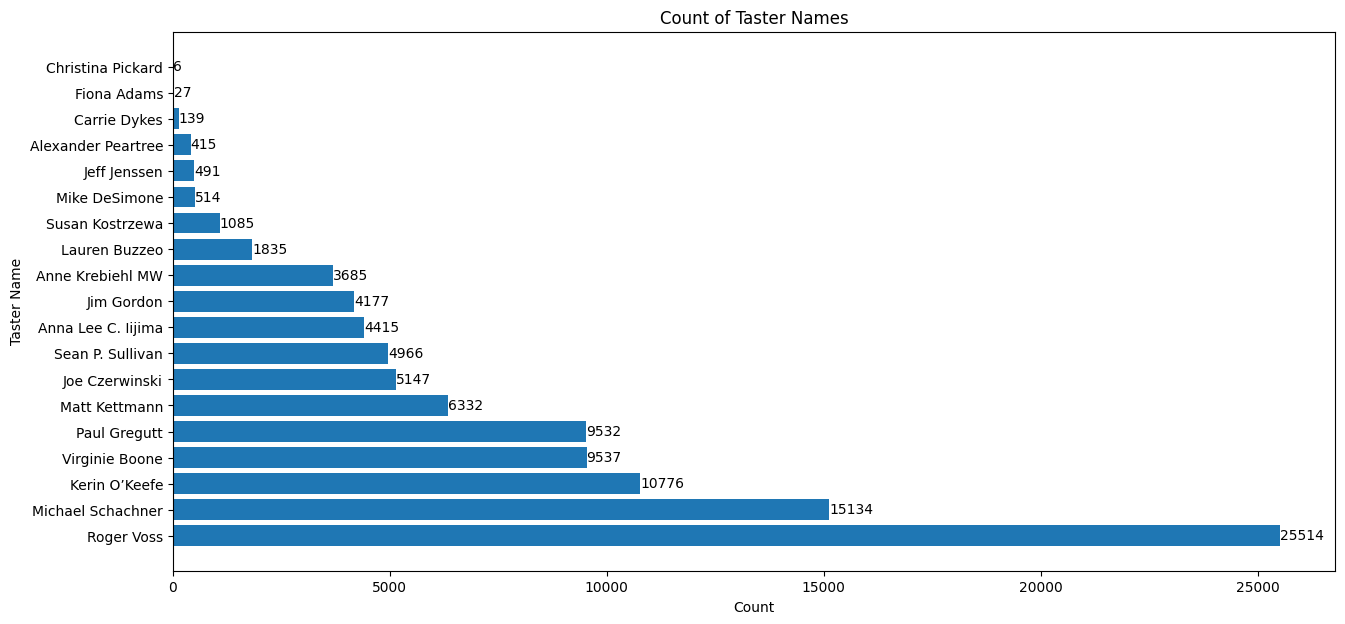

In [70]:
taster_name_counts = reviews['taster_name'].value_counts()

# Plotting a horizontal bar graph
plt.figure(figsize=(15, 7))
plt.barh(taster_name_counts.index, taster_name_counts.values)
plt.title('Count of Taster Names')
plt.xlabel('Count')
plt.ylabel('Taster Name')

# Displaying count values on the bars
for i, count in enumerate(taster_name_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

### 5. Highest and Lowest Wine type by reviews

In [81]:
reviews.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [82]:
variety_counts = reviews['variety'].value_counts()

max_count_variety = variety_counts.idxmax()
min_count_variety = variety_counts.idxmin()

max_count = variety_counts[max_count_variety]
min_count = variety_counts[min_count_variety]

print("variety with maximum count:", max_count_variety)
print("Maximum count:", max_count)
print("variety with minimum count:", min_count_variety)
print("Minimum count:", min_count)

variety with maximum count: Pinot Noir
Maximum count: 13272
variety with minimum count: Karalahna
Minimum count: 1


# Country wise production, points,